# Forward Problem
## Diffusion 

In [2]:
from diffusion import DiffusionNN, make_forward_fn, make_diffusion_loss
import torch
import torchopt
from tqdm import tqdm

[2024-04-21 19:47:34,990] torch.distributed.elastic.multiprocessing.redirects: [WARNING] NOTE: Redirects are currently not supported in Windows or MacOs.


In [12]:
#Constants to initialize
x_domain = (-1, 1)
t_domain = (0, 1)
learning_rate = 0.01
n_epochs = 1000
batch_size = 300    #Reduce the batch size in order to make it more realistic (like 10)

In [13]:
#Model and functional setup
diffusion_model = DiffusionNN()
diffusion_function = make_forward_fn(diffusion_model)

diffusion_loss = make_diffusion_loss(diffusion_function)

optimizer = torchopt.FuncOptimizer(torchopt.adam(lr=learning_rate))

params = tuple(diffusion_model.parameters())

 Training the network with a random uniform distribution

In [14]:
training_progress = tqdm(total=n_epochs, desc= "Training Process")

Epoch 100, Loss: 3.1857: 100%|██████████| 100/100 [02:41<00:00,  1.61s/it]


In [15]:
#Defining the training process
loss_evolution = []

for epoch in range(n_epochs):
    #Let's start with a uniform distribution of the data 
    x = torch.FloatTensor(batch_size).uniform_(x_domain[0], x_domain[1])
    t = torch.FloatTensor(batch_size).uniform_(t_domain[0], t_domain[1])

    #We compute the loss
    loss = diffusion_loss(x, t, params)
    #Update the parameters with the functional optimizer
    params = optimizer.step(loss, params)
    #Keeping track of the loss
    loss_evolution.append(float(loss))
    training_progress.set_description(f"Epoch {epoch + 1}, Loss: {loss:.4f}")
    training_progress.update(1)
    #tqdm.write(f"At epoch {epoch + 1} the model has the following loss: {loss}")

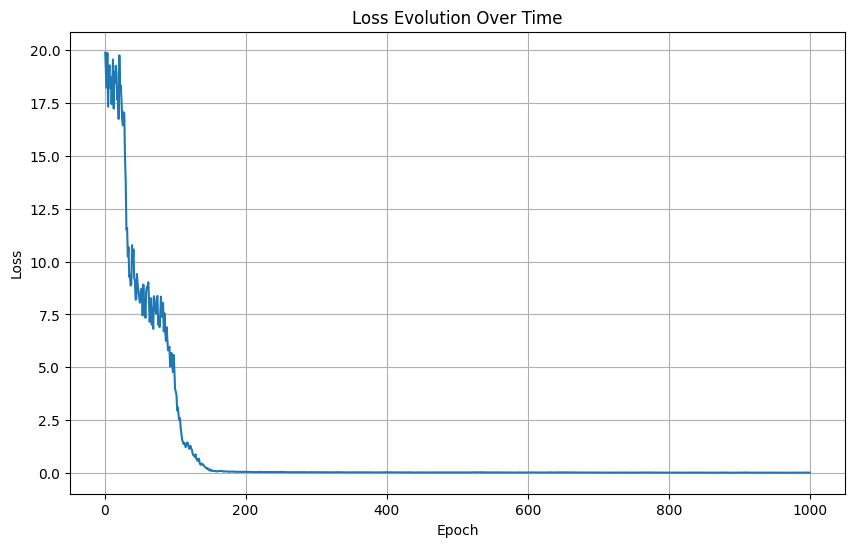

In [17]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(range(1, n_epochs + 1), loss_evolution, linestyle='-')
plt.title('Loss Evolution Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [6]:
batch_size = 30
x_domain = (-1, 1)
t_domain = (0, 1)

In [7]:
x = torch.FloatTensor(batch_size).uniform_(x_domain[0], x_domain[1])
t = torch.FloatTensor(batch_size).uniform_(t_domain[0], t_domain[1])

x_t = torch.stack((x, t), dim = 1)

In [9]:
x.shape

torch.Size([30])

In [8]:
x_t.shape

torch.Size([30, 2])